# Import

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/SKN/2team/data/final_data.csv')
df

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.000000,1.00,...,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.000000,0.00,...,2,145,84,58,42,1678,1158,448313.054,2168,220
2,13,63,1,9,0,783,3874,4023,0.000000,1.00,...,27,1173,390,246,308,5003,5784,1435958.164,2047,817
3,4,28,0,9,0,270,1589,1738,0.000000,0.90,...,10,81,20,12,16,438,343,107171.103,2021,761
4,22,38,0,9,0,784,3874,4023,0.000000,1.00,...,27,711,528,246,218,1129,2593,419622.336,2020,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356272,10,27,1,9,0,390,1937,1937,0.000000,1.00,...,13,2265,462,312,298,15127,15472,3923982.034,577,535
356273,4,31,1,4,0,390,1937,1937,0.000000,1.00,...,13,290,95,45,29,2500,2659,668510.530,580,531
356274,5,21,0,9,0,490,2189,2189,0.000000,0.25,...,12,1758,473,293,278,6635,5013,1780429.233,545,529
356275,5,22,1,7,0,540,1782,1782,0.000000,1.00,...,18,953,178,74,164,7081,7023,1865451.074,548,527


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356277 entries, 0 to 356276
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   city                   356277 non-null  int64  
 1   bd                     356277 non-null  int64  
 2   gender                 356277 non-null  int64  
 3   registered_via         356277 non-null  int64  
 4   is_churn               356277 non-null  int64  
 5   payment_plan_sum       356277 non-null  int64  
 6   plan_list_price        356277 non-null  int64  
 7   actual_amount_paid     356277 non-null  int64  
 8   discount_rate          356277 non-null  float64
 9   is_auto_renew          356277 non-null  float64
 10  is_cancel              356277 non-null  float64
 11  transaction_count      356277 non-null  int64  
 12  num_25                 356277 non-null  int64  
 13  num_50                 356277 non-null  int64  
 14  num_75                 356277 non-nu

In [7]:
df.columns

Index(['city', 'bd', 'gender', 'registered_via', 'is_churn',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_duration', 'listening_duration'],
      dtype='object')

## Correlation

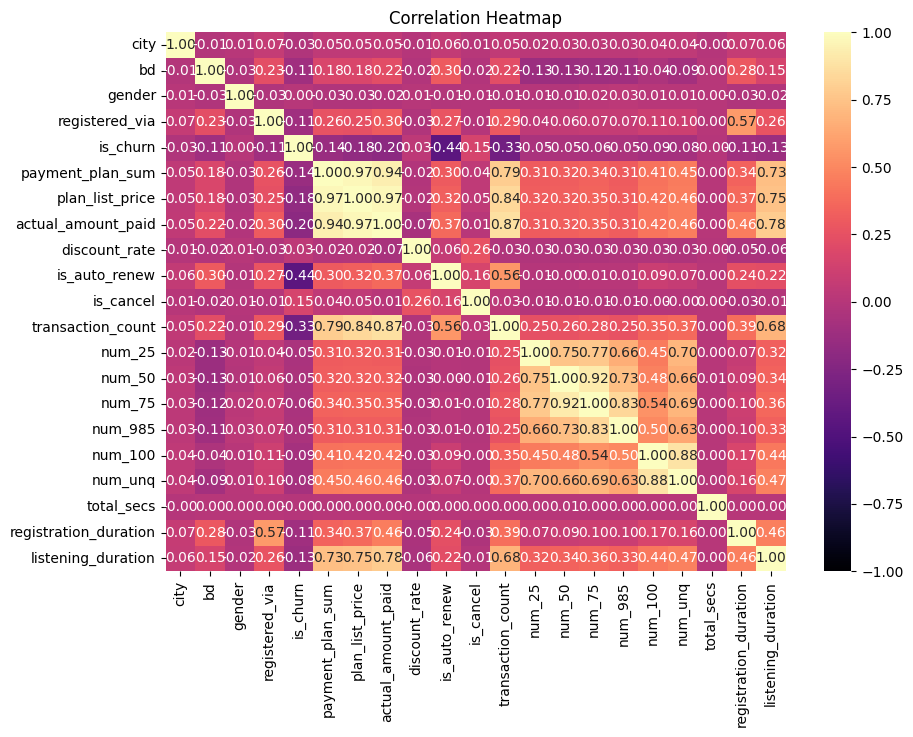

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
print(corr_matrix)

                           city        bd    gender  registered_via  is_churn  \
city                   1.000000 -0.013063  0.009804        0.067599 -0.025750   
bd                    -0.013063  1.000000 -0.028844        0.229834 -0.106311   
gender                 0.009804 -0.028844  1.000000       -0.030557  0.003068   
registered_via         0.067599  0.229834 -0.030557        1.000000 -0.108751   
is_churn              -0.025750 -0.106311  0.003068       -0.108751  1.000000   
payment_plan_sum       0.045360  0.177997 -0.029183        0.255392 -0.135556   
plan_list_price        0.046043  0.176996 -0.029305        0.248424 -0.175820   
actual_amount_paid     0.053369  0.218927 -0.020045        0.298156 -0.201582   
discount_rate         -0.005693 -0.018566  0.005407       -0.026056  0.034711   
is_auto_renew          0.058377  0.302037 -0.009520        0.270503 -0.438591   
is_cancel              0.006623 -0.020724 -0.007330       -0.005242  0.152747   
transaction_count      0.049

## Model Train - 사용할 컬럼

**Features**
- 'is_churn' 제외하고 all

**label**
- 'is_churn'



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 평가 함수 정의
def evaluate_model(y_test, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"📌 {model_name} 성능 평가:")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"AUC Score : {auc:.4f}")

    # Confusion Matrix 출력
    print(f"Confusion Matrix:\n{cm}")
    print("-" * 40)

In [11]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['is_churn'])
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state = 42)
X_res, y_res = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()

scaler.fit(X_res)

X_res_scaled = scaler.transform(X_res)
X_test_scaled = scaler.transform(X_test)

In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_res_scaled, y_res, eval_set=[(X_res_scaled, y_res), (X_test_scaled, y_test)], verbose=True)
xgb_y_pred = xgb_model.predict(X_test_scaled)

[0]	validation_0-logloss:0.56755	validation_1-logloss:0.56927
[1]	validation_0-logloss:0.49787	validation_1-logloss:0.50212
[2]	validation_0-logloss:0.45743	validation_1-logloss:0.46387
[3]	validation_0-logloss:0.43092	validation_1-logloss:0.43901
[4]	validation_0-logloss:0.41410	validation_1-logloss:0.42324
[5]	validation_0-logloss:0.40323	validation_1-logloss:0.41315
[6]	validation_0-logloss:0.39518	validation_1-logloss:0.40498
[7]	validation_0-logloss:0.38959	validation_1-logloss:0.39949
[8]	validation_0-logloss:0.38534	validation_1-logloss:0.39491
[9]	validation_0-logloss:0.38219	validation_1-logloss:0.39190
[10]	validation_0-logloss:0.38044	validation_1-logloss:0.39036
[11]	validation_0-logloss:0.37761	validation_1-logloss:0.38795
[12]	validation_0-logloss:0.37599	validation_1-logloss:0.38614
[13]	validation_0-logloss:0.37415	validation_1-logloss:0.38423
[14]	validation_0-logloss:0.37285	validation_1-logloss:0.38334
[15]	validation_0-logloss:0.37225	validation_1-logloss:0.38283
[1

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

stratified_kfold = StratifiedKFold(n_splits=5)

xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    tree_method="gpu_hist"
)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',
    cv=stratified_kfold,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_res_scaled, y_res)

# 최적의 파라미터 출력
print(f"🏆 최적의 하이퍼파라미터: {grid_search.best_params_}")

# 최적 모델로 성능 평가
best_xgb = grid_search.best_estimator_

# eval_set을 사용하여 최적 모델 학습 (GridSearch 후 개별 모델 학습)
best_xgb.fit(X_res_scaled, y_res, eval_set=[(X_res_scaled, y_res), (X_test_scaled, y_test)], verbose=True)

# 테스트 데이터 예측
y_pred_best = best_xgb.predict(X_test_scaled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:23:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


🏆 최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
[0]	validation_0-logloss:0.60241	validation_1-logloss:0.60327
[1]	validation_0-logloss:0.54195	validation_1-logloss:0.54460
[2]	validation_0-logloss:0.49881	validation_1-logloss:0.50302
[3]	validation_0-logloss:0.46857	validation_1-logloss:0.47432
[4]	validation_0-logloss:0.44538	validation_1-logloss:0.45226
[5]	validation_0-logloss:0.42779	validation_1-logloss:0.43586
[6]	validation_0-logloss:0.41457	validation_1-logloss:0.42346
[7]	validation_0-logloss:0.40421	validation_1-logloss:0.41360
[8]	validation_0-logloss:0.39650	validation_1-logloss:0.40627
[9]	validation_0-logloss:0.39043	validation_1-logloss:0.40099
[10]	validation_0-logloss:0.38550	validation_1-logloss:0.39640


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:23:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[11]	validation_0-logloss:0.38175	validation_1-logloss:0.39301
[12]	validation_0-logloss:0.37866	validation_1-logloss:0.39053
[13]	validation_0-logloss:0.37607	validation_1-logloss:0.38829
[14]	validation_0-logloss:0.37402	validation_1-logloss:0.38635
[15]	validation_0-logloss:0.37192	validation_1-logloss:0.38459
[16]	validation_0-logloss:0.37015	validation_1-logloss:0.38300
[17]	validation_0-logloss:0.36812	validation_1-logloss:0.38104
[18]	validation_0-logloss:0.36694	validation_1-logloss:0.38013
[19]	validation_0-logloss:0.36571	validation_1-logloss:0.37928
[20]	validation_0-logloss:0.36442	validation_1-logloss:0.37829
[21]	validation_0-logloss:0.36336	validation_1-logloss:0.37747
[22]	validation_0-logloss:0.36224	validation_1-logloss:0.37662
[23]	validation_0-logloss:0.36159	validation_1-logloss:0.37627
[24]	validation_0-logloss:0.36121	validation_1-logloss:0.37595
[25]	validation_0-logloss:0.36001	validation_1-logloss:0.37514
[26]	validation_0-logloss:0.35941	validation_1-logloss:

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:23:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:23:36] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


**모델 성능**

In [21]:
evaluate_model(y_test, xgb_y_pred, "XGBoost 기본 모델")
evaluate_model(y_test, y_pred_best, "XGBoost 최적의 파라미터 모델")

📌 XGBoost 기본 모델 성능 평가:
Accuracy  : 0.8254
Precision : 0.5056
Recall    : 0.8643
F1 Score  : 0.6380
AUC Score : 0.8406
Confusion Matrix:
[[47849 10721]
 [ 1722 10964]]
----------------------------------------
📌 XGBoost 최적의 파라미터 모델 성능 평가:
Accuracy  : 0.8443
Precision : 0.5411
Recall    : 0.8276
F1 Score  : 0.6543
AUC Score : 0.8378
Confusion Matrix:
[[49665  8905]
 [ 2187 10499]]
----------------------------------------


## Overfitting 여부
- Train vs Validation
- cross validation
- ROC Curve & AUC

Train 성능 vs Validation 성능

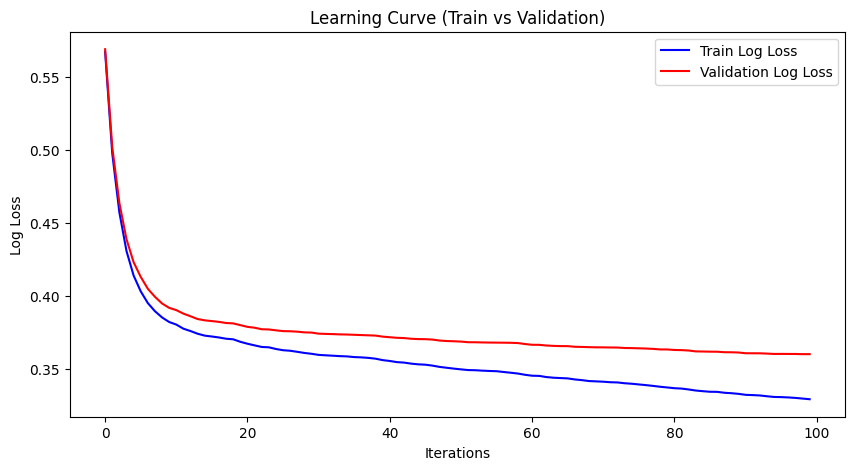

In [14]:
results = xgb_model.evals_result()

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['logloss'], label="Train Log Loss", color='blue')
plt.plot(results['validation_1']['logloss'], label="Validation Log Loss", color='red')

plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Learning Curve (Train vs Validation)")
plt.legend()
plt.show()

교차검증

In [19]:
import warnings

# 경고 메시지 표시하지 않기
warnings.simplefilter("ignore")

In [20]:
from sklearn.model_selection import cross_val_score

cv_scores1 = cross_val_score(xgb_model, X_res_scaled, y_res, cv=5, scoring='f1')
print(f"(default param) Cross Validation F1 Score: {cv_scores1.mean():.4f} ± {cv_scores1.std():.4f}")

cv_scores = cross_val_score(best_xgb, X_res_scaled, y_res, cv=5, scoring='f1')
print(f"(best param) Cross Validation F1 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

(default param) Cross Validation F1 Score: 0.8611 ± 0.0010
(best param) Cross Validation F1 Score: 0.8893 ± 0.0023


결론: 표준편차가 작으며, Train log loss와 validation log loss의 차이가 별반 다르지 않으므로 과적합이 없는 안정적인 모델이다.

**AUC & ROC Curve**

- 파란색 -- 선: 기본 모델의 ROC 곡선
- 빨간색 - 선: 최적화된 모델의 ROC 곡선
- 회색 -- 선: 랜덤 분류기 (AUC=0.5) 기준선

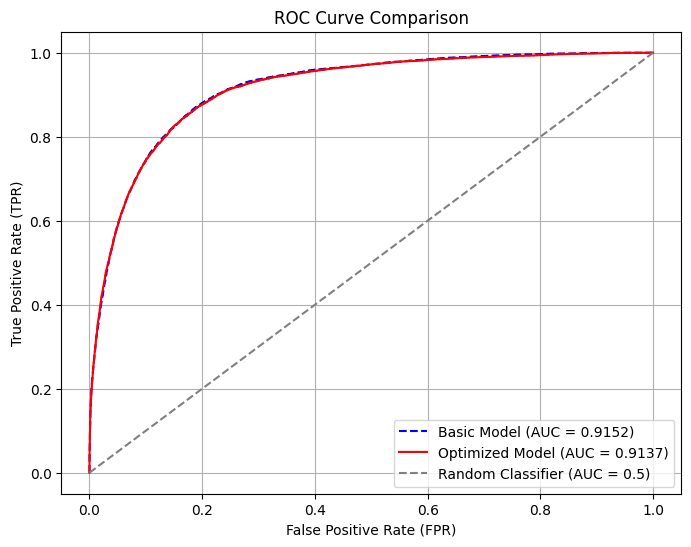

In [16]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 데이터 계산
y_probs_basic = xgb_model.predict_proba(X_test_scaled)[:, 1]  # 기본 모델 확률 예측값
y_probs_best = best_xgb.predict_proba(X_test_scaled)[:, 1]  # 최적 모델 확률 예측값

fpr_basic, tpr_basic, _ = roc_curve(y_test, y_probs_basic)
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best)

auc_basic = auc(fpr_basic, tpr_basic)
auc_best = auc(fpr_best, tpr_best)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, linestyle='--', color='blue', label=f"Basic Model (AUC = {auc_basic:.4f})")
plt.plot(fpr_best, tpr_best, linestyle='-', color='red', label=f"Optimized Model (AUC = {auc_best:.4f})")

# 랜덤 예측 기준선
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier (AUC = 0.5)")

# 그래프 설정
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

**Feature Importance**

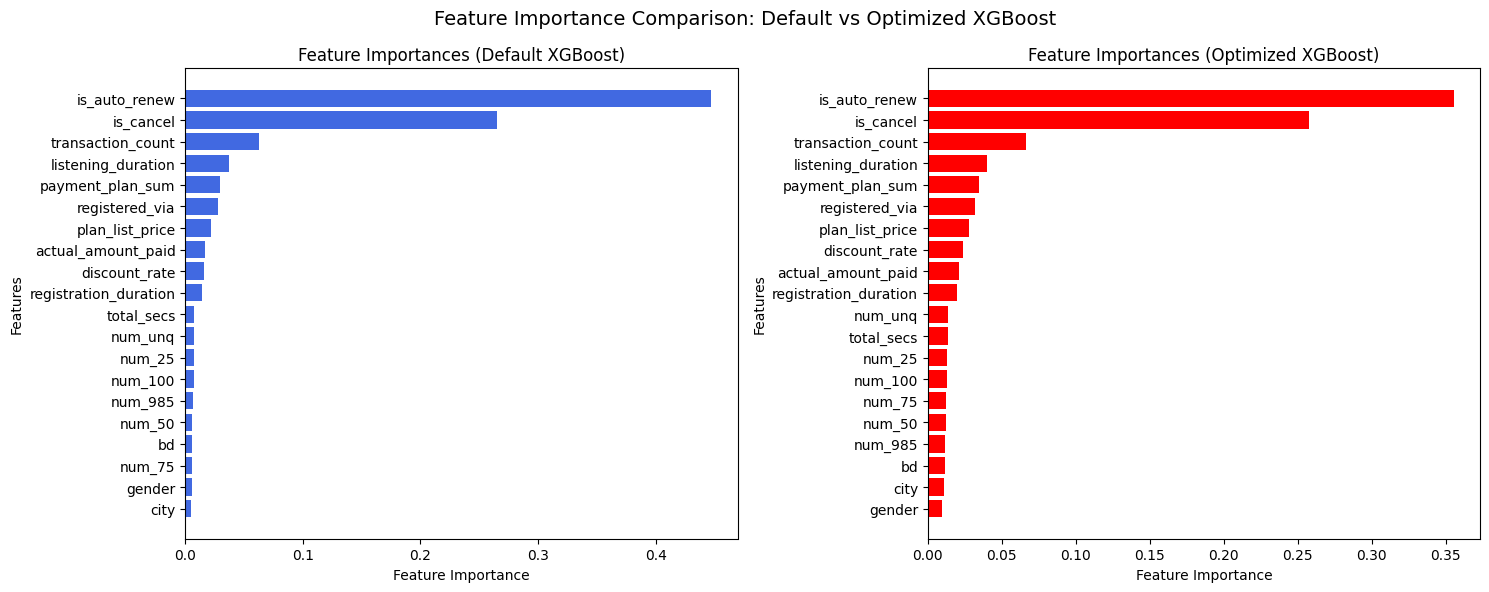

In [18]:
feature_importance_d = xgb_model.feature_importances_
feature_importance = best_xgb.feature_importances_
features = X_train.columns

sorted_idx_d = np.argsort(feature_importance_d)[::-1]
sorted_features_d = [features[i] for i in sorted_idx_d]
sorted_importance_d = feature_importance_d[sorted_idx_d]

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(sorted_features_d, sorted_importance_d, color='royalblue')
axes[0].set_title("Feature Importances (Default XGBoost)")
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Features")
axes[0].invert_yaxis()

# 시각화
axes[1].barh(sorted_features, sorted_importance, color='red')
axes[1].set_title("Feature Importances (Optimized XGBoost)")
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Features")
axes[1].invert_yaxis()

plt.suptitle("Feature Importance Comparison: Default vs Optimized XGBoost", fontsize=14)
plt.tight_layout()
plt.show()

# bestParameter로 RandomSampling 데이터 5번 이용해서 결과 내기

- bestparams
  - {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}

In [23]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_sacaled = scaler.transform

In [24]:
best_params = grid_search.best_params_
xgb_clf = XGBClassifier(random_state=42, **best_params)

xgb_accuracy_over=[]
xgb_precision_over=[]
xgb_recall_over=[]
xgb_matrix_over=[]
xgb_curve_over=[]

for train_index, val_index in stratified_kfold.split(X_res, y_res):
  X_train, y_train = X_res.iloc[train_index], y_res.iloc[train_index]
  X_val, y_val = X_res.iloc[val_index], y_res.iloc[val_index]

  xgb_clf.fit(X_train, y_train)
  y_pred_xgb = xgb_clf.predict(X_val)
  y_pred_proba = xgb_clf.predict_proba(X_val)[:, 1]

  xgb_accuracy_over.append(accuracy_score(y_val, y_pred_xgb))
  xgb_precision_over.append(precision_score(y_val, y_pred_xgb))
  xgb_recall_over.append(recall_score(y_val, y_pred_xgb))
  xgb_matrix_over.append(confusion_matrix(y_val, y_pred_xgb))
  xgb_curve_over.append(roc_curve(y_val, y_pred_xgb))

print("xgboost 정확도:", np.mean(xgb_accuracy_over))
print("xgboost 정밀도:", np.mean(xgb_precision_over))
print("xgboost 재현율:", np.mean(xgb_recall_over))

xgboost 정확도: 0.8792098632265164
xgboost 정밀도: 0.8520292408290047
xgboost 재현율: 0.9180709548129851


In [26]:
xgb_matrix_over

[array([[50662,  8099],
        [ 5026, 53735]]),
 array([[50038,  8723],
        [ 4840, 53920]]),
 array([[48780,  9981],
        [ 4745, 54015]]),
 array([[48990,  9770],
        [ 4856, 53905]]),
 array([[48427, 10333],
        [ 4604, 54157]])]

In [27]:
xgb_curve_over

[(array([0.        , 0.13782951, 1.        ]),
  array([0.        , 0.91446708, 1.        ]),
  array([inf,  1.,  0.])),
 (array([0.       , 0.1484488, 1.       ]),
  array([0.        , 0.91763104, 1.        ]),
  array([inf,  1.,  0.])),
 (array([0.        , 0.16985756, 1.        ]),
  array([0.        , 0.91924779, 1.        ]),
  array([inf,  1.,  0.])),
 (array([0.        , 0.16626957, 1.        ]),
  array([0.        , 0.91736015, 1.        ]),
  array([inf,  1.,  0.])),
 (array([0.        , 0.17585092, 1.        ]),
  array([0.        , 0.92164871, 1.        ]),
  array([inf,  1.,  0.]))]